In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

## loading model with dummy variables and $m^{2}$ as value to predict

In [2]:
infile = open('..//real_estate_data_frame_sqr_dummy','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
X = frame.iloc[:, 1:].values

In [4]:
y = frame.iloc[:, 0].values

## train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()

In [9]:
X_train = sc_X.fit_transform(X_train)

In [10]:
X_test = sc_X.transform(X_test)

In [11]:
sc_y = StandardScaler()

In [12]:
y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))

In [13]:
y_train = y_train.reshape(len(y_train),) # for regressor

## svr and grid search

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [15]:
parameters = [{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

In [16]:
grid_search = GridSearchCV(estimator = SVR(),
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)

In [17]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 31.0 min.


In [18]:
grid_search.best_score_

0.43647893977420865

In [19]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [20]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,33.453501,0.399640,3.361402,0.204773,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.530036,0.450814,...,0.364182,0.434296,0.493293,0.442958,0.461616,0.442141,0.327595,0.435143,0.055663,4
1,33.638743,0.462949,3.349703,0.159708,1,0.2,rbf,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.510961,0.402619,...,0.344156,0.372601,0.463576,0.406434,0.422684,0.392876,0.298291,0.399837,0.056064,8
2,32.499469,0.366591,3.357823,0.107551,1,0.3,rbf,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",0.495662,0.372290,...,0.333779,0.344684,0.441462,0.384563,0.400388,0.369071,0.281562,0.380220,0.055539,18
3,31.898181,0.157638,3.281726,0.122377,1,0.4,rbf,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",0.487957,0.355614,...,0.323342,0.333501,0.432615,0.369307,0.388963,0.360006,0.269046,0.369420,0.056757,34
4,31.035085,0.494986,3.397339,0.254796,1,0.5,rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.483233,0.344514,...,0.320193,0.327262,0.431316,0.359641,0.382974,0.354980,0.262750,0.363661,0.057568,35
5,31.866212,0.151500,3.307357,0.079306,1,0.6,rbf,"{'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}",0.479632,0.338265,...,0.319081,0.323346,0.429761,0.353760,0.379266,0.351874,0.259010,0.360121,0.057789,36
6,32.160551,0.416121,3.416365,0.175544,1,0.7,rbf,"{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}",0.477147,0.334874,...,0.318372,0.320481,0.428512,0.349721,0.376648,0.349010,0.255318,0.357656,0.058131,37
7,32.190347,0.478764,3.451572,0.137207,1,0.8,rbf,"{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}",0.475284,0.332906,...,0.317983,0.318566,0.427555,0.347045,0.374594,0.346808,0.252822,0.355939,0.058293,38
8,32.143947,0.433174,3.376074,0.107027,1,0.9,rbf,"{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}",0.474063,0.331677,...,0.317762,0.317647,0.427103,0.345298,0.372411,0.345236,0.251136,0.354754,0.058382,39
9,32.387842,0.580723,3.294492,0.119009,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.473181,0.330915,...,0.317585,0.316974,0.426941,0.344136,0.371072,0.344280,0.249974,0.353977,0.058458,40


In [37]:
start = time.time()

model = SVR(C = 1,kernel = 'rbf',gamma = 0.1)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 0.0 min.


## model evaluation

In [38]:
from sklearn.metrics import r2_score

In [39]:
predictions = model.predict(X_test)

In [40]:
predictions = sc_y.inverse_transform(predictions)

In [41]:
r2_score(y_test,predictions)

0.4227057576506442

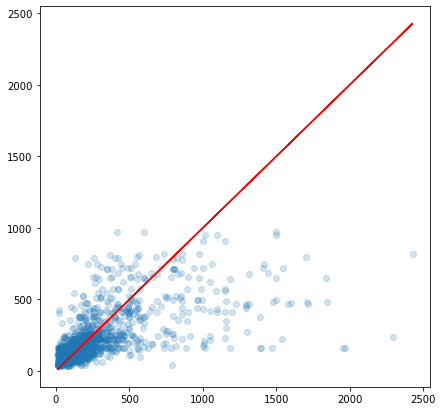

In [42]:
plt.figure(figsize=(7,7))
# plt.xlim(700,2500)
# plt.ylim(0,500)

# predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# perfect predictions
plt.plot(y_test,y_test,'r')

In [43]:
predictions

array([109.73539183, 100.48796154, 426.45558646, ..., 320.75582089,
        56.82745064,  81.59105238])

In [44]:
predictions[:20]/y_test[:20]

array([1.99518894, 1.58215088, 0.8307768 , 1.18376863, 1.2520017 ,
       2.66722225, 2.063191  , 0.89648266, 0.96505602, 0.72976451,
       0.67634236, 0.90870269, 0.86074844, 0.95128948, 0.395841  ,
       2.69721605, 1.25319944, 3.46742755, 0.2112775 , 0.9358548 ])